In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
# Move out of the notebook folder to access datasets
working_dir = os.getcwd()
working_dir = working_dir.strip('notebooks')
data_dir = working_dir + 'results/ComparativeAnalysis/'


## Load the datasets with the Modules for each method
hc_modules_dir = data_dir + 'TumorModulesExP_HC.csv'
wgcna_modules_dir = data_dir + 'TumorModulesExP_WGCNA.csv'
gcnn_MSI_modules_dir = data_dir + 'MSIStatusModulesExP_GCNN.csv'
gcnn_CMS_modules_dir = data_dir + 'CMSTumorModulesExP_GCNN.csv'
gcnn_TS_modules_dir = data_dir + 'TumorSiteModulesExP_GCNN.csv'
gcnn_gender_modules_dir = data_dir + 'GenderModulesExP_GCNN.csv'


hc_modules = pd.read_csv(hc_modules_dir, index_col=0)
wgcna_modules = pd.read_csv(wgcna_modules_dir, index_col=0)
gcnn_MSI_modules = pd.read_csv(gcnn_MSI_modules_dir, index_col=0)
gcnn_CMS_modules = pd.read_csv(gcnn_CMS_modules_dir, index_col=0)
gcnn_TS_modules = pd.read_csv(gcnn_TS_modules_dir, index_col=0)
gcnn_gender_modules = pd.read_csv(gcnn_gender_modules_dir, index_col=0)

We need to manually select what modules from HC and WGCNA are the relevant ones for MSI, CMS and Tumour Site. We do this with visual inspection of the Heatmaps:

 - MSI:
    - HC --> Module 50 and module 31 
    - WGCNA --> Module 109, module 82, module 55, module 30, module 24, module 18 and module 12

 - CMS:
    - HC --> Module 50 and module 31 (not over threshold of interest - coefficients>0.45) 
    - WGCNA --> Module 109, module 88, module 81, module 42, module 24 and module 18

 - Tumour Site:
    - HC --> Module 20
    - WGCNA --> Module 30 and module 57 (not over threshold of interest - coefficients>0.45) 

 - Gender (misslabeled):
    - HC --> Module 12
    - WGCNA --> Module 58

In [3]:
# Check that it has the correct dimensions

print(f"Shape of HC Modules: {hc_modules.shape}")
print(f"Shape of WGCNA Modules: {wgcna_modules.shape}")
print(f"Shape of GCNN MSI Modules: {gcnn_MSI_modules.shape}")
print(f"Shape of GCNN CMS Modules: {gcnn_CMS_modules.shape}")
print(f"Shape of GCNN Tumor Site Modules: {gcnn_TS_modules.shape}")
print(f"Shape of GCNN Gender Modules: {gcnn_gender_modules.shape}")

Shape of HC Modules: (17976, 1065)
Shape of WGCNA Modules: (17976, 1065)
Shape of GCNN MSI Modules: (27, 1065)
Shape of GCNN CMS Modules: (35, 1065)
Shape of GCNN Tumor Site Modules: (99, 1065)
Shape of GCNN Gender Modules: (56, 1065)


## Gender Analysis

 - Gender (misslabeled):
    - HC --> Module 12
    - WGCNA --> Module 58

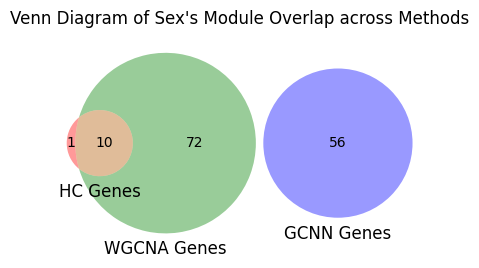

In [14]:
# Extract the modules of interest from HC and WGCNA
hc_modules_gender = hc_modules[hc_modules['Module'] == 12]
wgcna_modules_gender = wgcna_modules[wgcna_modules['Module'] == 58]

# Extract the names of the Genes from all 3 modules
hc_gender_gene_names = set(hc_modules_gender['Gene Name'])
wgcna_gender_gene_names = set(wgcna_modules_gender['Gene Name'])
gcnn_gender_gene_names = set(gcnn_gender_modules['Gene Name'])

# Create the Venn diagram
plt.figure(figsize=(5, 3))
venn3([hc_gender_gene_names, wgcna_gender_gene_names, gcnn_gender_gene_names], ('HC Genes', 'WGCNA Genes', 'GCNN Genes'))

# Display the Venn diagram
plt.title("Venn Diagram of Sex's Module Overlap across Methods")
plt.show()

## MSI Status Analysis

 - MSI:
    - HC --> Module 50 and module 31 
    - WGCNA --> Module 109, module 82, module 55, module 30, module 24, module 18 and module 12

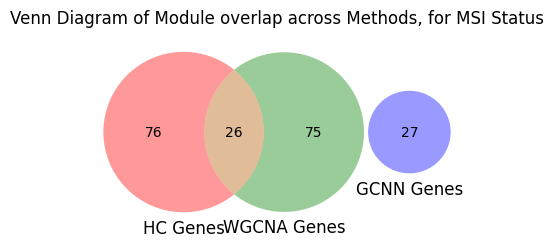

In [15]:
# Extract the modules of interest from HC and WGCNA
hc_modules_MSI = hc_modules[hc_modules['Module'].isin([50, 31])]
wgcna_modules_MSI = wgcna_modules[wgcna_modules['Module'].isin([55, 24, 18, 12])]

# Extract the names of the Genes from all 3 modules
hc_MSI_gene_names = set(hc_modules_MSI['Gene Name'])
wgcna_MSI_gene_names = set(wgcna_modules_MSI['Gene Name'])
gcnn_MSI_gene_names = set(gcnn_MSI_modules['Gene Name'])

# Create the Venn diagram
plt.figure(figsize=(5, 3))
venn3([hc_MSI_gene_names, wgcna_MSI_gene_names, gcnn_MSI_gene_names], ('HC Genes', 'WGCNA Genes', 'GCNN Genes'))

# Display the Venn diagram
plt.title("Venn Diagram of Module overlap across Methods, for MSI Status")
plt.show()

## CMS Tumour

 - CMS:
    - HC --> Module 50 and module 31 (not over threshold of interest - coefficients>0.45) 
    - WGCNA --> Module 109, module 88, module 81, module 42, module 24 and module 18

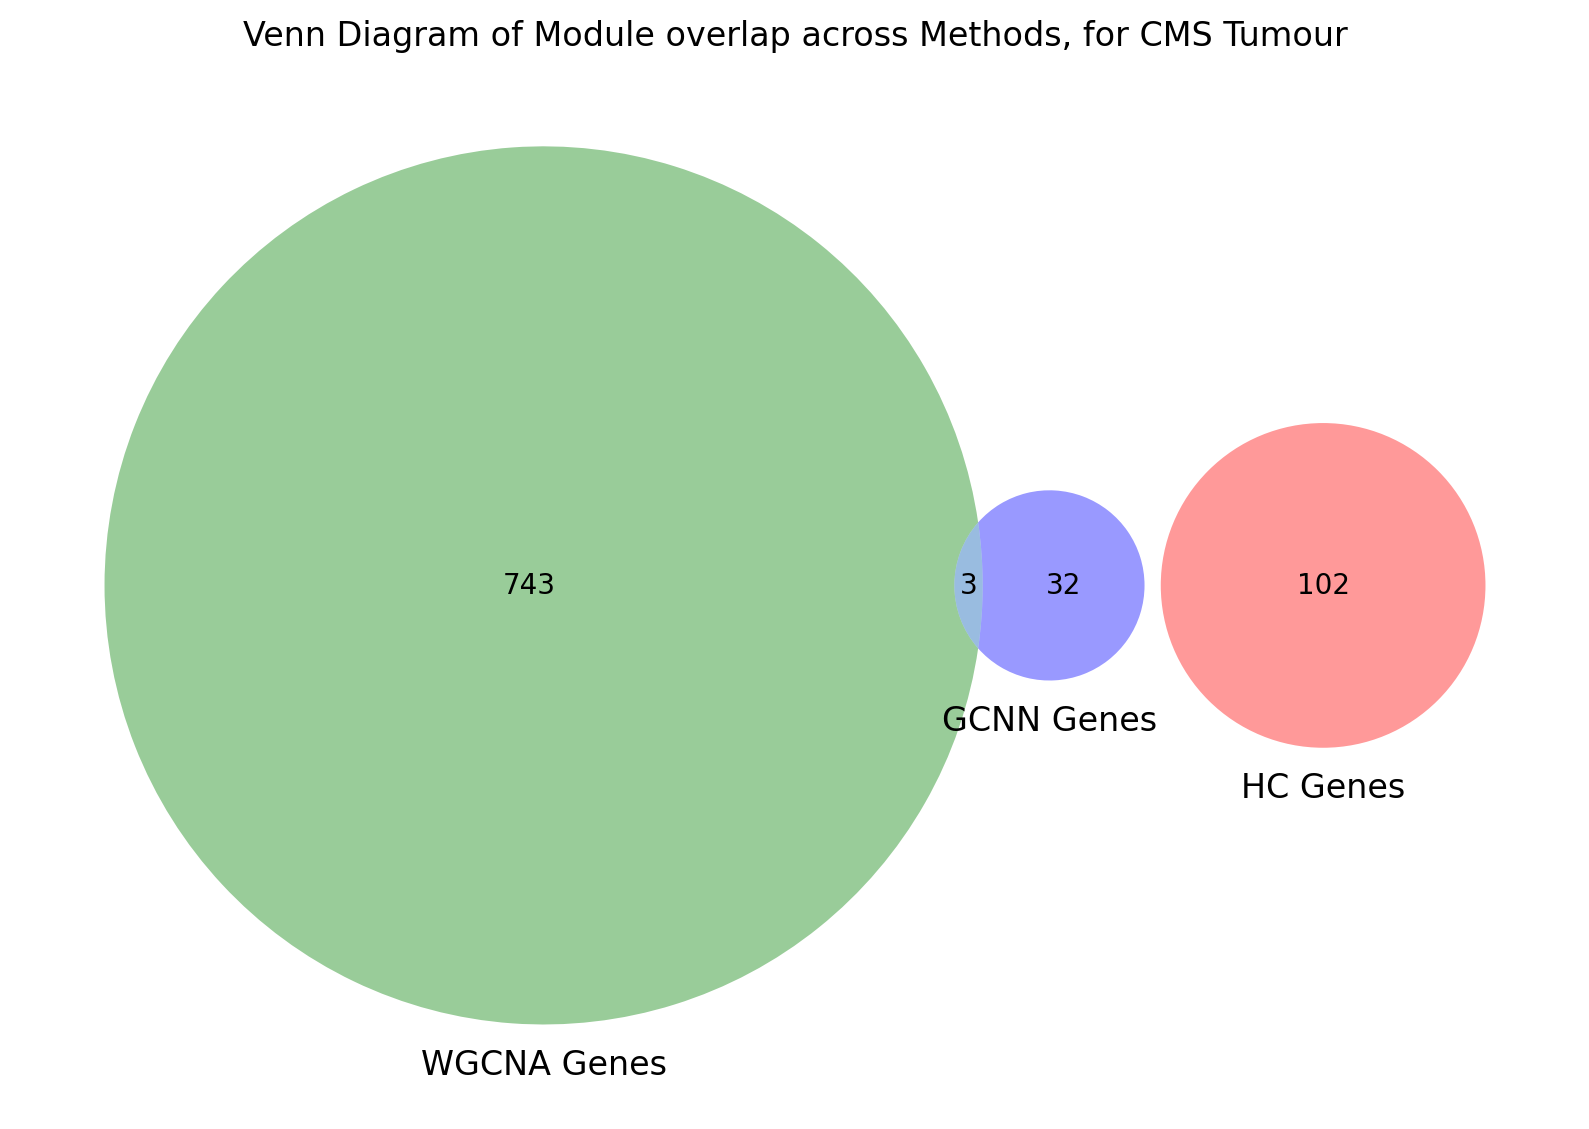

In [71]:
# Extract the modules of interest from HC and WGCNA
hc_modules_CMS = hc_modules[hc_modules['Module'].isin([50, 31])]
wgcna_modules_CMS = wgcna_modules[wgcna_modules['Module'].isin([109, 88, 81, 42, 24, 18])]

# Extract the names of the Genes from all 3 modules
hc_CMS_gene_names = set(hc_modules_CMS['Gene Name'])
wgcna_CMS_gene_names = set(wgcna_modules_CMS['Gene Name'])
gcnn_CMS_gene_names = set(gcnn_CMS_modules['Gene Name'])

# Create the Venn diagram
plt.figure(figsize=(10, 7))
venn3([hc_CMS_gene_names, wgcna_CMS_gene_names, gcnn_CMS_gene_names], ('HC Genes', 'WGCNA Genes', 'GCNN Genes'))

# Display the Venn diagram
plt.title("Venn Diagram of Module overlap across Methods, for CMS Tumour")
plt.show()

## Tumour Site

 - Tumour Site:
    - HC --> Module 20
    - WGCNA --> Module 30 and module 57 (not over threshold of interest - coefficients>0.45) 

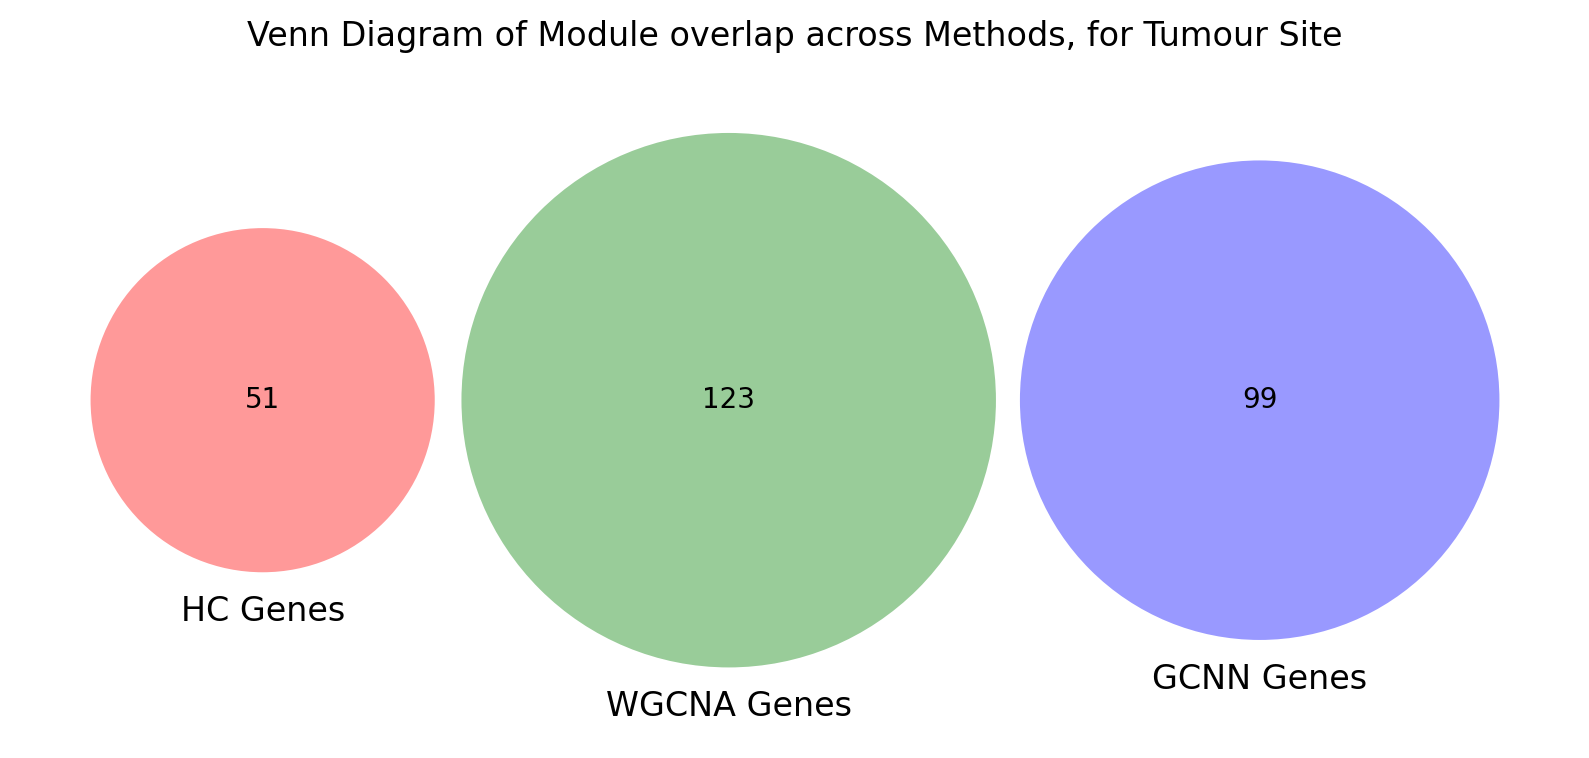

In [72]:
# Extract the modules of interest from HC and WGCNA
hc_modules_TS = hc_modules[hc_modules['Module'].isin([20])]
wgcna_modules_TS = wgcna_modules[wgcna_modules['Module'].isin([30, 57])]

# Extract the names of the Genes from all 3 modules
hc_TS_gene_names = set(hc_modules_TS['Gene Name'])
wgcna_TS_gene_names = set(wgcna_modules_TS['Gene Name'])
gcnn_TS_gene_names = set(gcnn_TS_modules['Gene Name'])

# Create the Venn diagram
plt.figure(figsize=(10, 7))
venn3([hc_TS_gene_names, wgcna_TS_gene_names, gcnn_TS_gene_names], ('HC Genes', 'WGCNA Genes', 'GCNN Genes'))

# Display the Venn diagram
plt.title("Venn Diagram of Module overlap across Methods, for Tumour Site")
plt.show()